In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.core import Activation
from keras.layers.core import Flatten, Dropout
from keras.layers.core import Dense
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.optimizers import Nadam
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import plot_model

from keras.callbacks import CSVLogger

import tensorflow as tf

Using TensorFlow backend.


In [2]:
def network(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

# changed output size on conv
def network_Conv64(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        64, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

# added convolutional layer
def network_addConv(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(Conv2D(32, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

# added convolutional layer
def network_addConv_Drop05(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(Conv2D(32, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

# added convolutional layer
def network_addConv_addDO(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(Conv2D(32, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

# added convolutional layer
def network_addConv_BatchNormal(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(Conv2D(32, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

In [3]:
class CIFAR10Dataset():
    def __init__(self):
        self.image_shape = (32, 32, 3)
        self.num_classes = 10
    def get_batch(self):
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
        x_train, x_test = [self.preprocess(d) for d in [x_train, x_test]]
        y_train, y_test = [self.preprocess(d, label_data=True) for d in [y_train, y_test]]
        return x_train, y_train, x_test, y_test
    def preprocess(self, data, label_data=False):
        if label_data:
            # convert class vectors to binary class matrices
            data = keras.utils.to_categorical(data, self.num_classes)
        else:
            data = data.astype("float32")
            data /= 255  # convert the value to 0~1 scale
            shape = (data.shape[0],) + self.image_shape  # add dataset length
            data = data.reshape(shape)
        return data

In [4]:
class Trainer():
    def __init__(self, model, loss, optimizer, label):
        self.label = label
        self._target = model
        self._target.compile( loss=loss, optimizer=optimizer, metrics=["accuracy"] )
        self.verbose = 1
        self.csv_logger = CSVLogger(label+'.csv', append=False, separator=';')
        logdir = label + "_cifar10_net"
        self.log_dir = os.path.join(os.path.dirname("__file__"), logdir)
        self.model_file_name = "model_file.hdf5"
        self.tensorboard = keras.callbacks.TensorBoard(log_dir=logdir)
        plot_model(model, to_file=label+'_model.png', show_shapes=True, show_layer_names=True) #, expand_nested=True)
        
    def train(self, x_train, y_train, batch_size, epochs, validation_split):
        if os.path.exists(self.log_dir):
            import shutil
            shutil.rmtree(self.log_dir)  # remove previous execution
        os.mkdir(self.log_dir)
        model_path = os.path.join(self.log_dir, self.model_file_name)
        self._target.fit(
            x_train, y_train,
            batch_size=batch_size, epochs=epochs,
            validation_split=validation_split,
            callbacks=[ TensorBoard(log_dir=self.log_dir), ModelCheckpoint(model_path,save_best_only=True), self.csv_logger, self.tensorboard ],
            verbose=self.verbose
        )

In [5]:
class Score:
    class Param:
        def __init__(self, label, data):
            self.label = label
            self.data = data
    
    def __init__(self, name, csvfile):
        self.name = name
        self.epoch = None
        self.acc = None
        self.loss = None
        self.val_loss = None
        self.val_accu = None
        self.read_csv(csvfile)
        
    def read_csv(self, filename):
        df = pd.read_csv(filename,sep=";")
        self.epoch = self.Param('epoch', df['epoch'].values)
        self.acc = self.Param('acc', df['acc'].values)
        self.loss = self.Param('loss', df['loss'].values)
        self.val_loss = self.Param('val_loss', df['val_loss'].values)
        self.val_acc = self.Param('val_acc', df['val_acc'].values)

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use(['science', 'notebook'])
%matplotlib inline

def plot_score(score):
    epoch = score.epoch.data+1
    loss = score.loss.data
    acc = score.acc.data
    val_loss = score.val_loss.data
    val_acc = score.val_acc.data

    xsize = 8 + 8 * ( (len(epoch)-1) // 10 )
    fig, axes = plt.subplots(figsize=[xsize, 6])
    if ((len(epoch)-1) // 10) > 0:
        axes.axvspan(10, 20, color="yellow", alpha=0.2)
    axes.plot(epoch, loss, label='loss')
    axes.text(epoch[-1],loss[-1], str(loss[-1]), ha='right')
    axes.plot(epoch,val_loss, label='val_loss')
    axes.text(epoch[-1],val_loss[-1], str(val_loss[-1]), ha='right')
    axes.legend(loc=(0.02, 0.16))
    axes.set_xlabel('epoch')
    axes.set_ylabel('loss')

    ax2 = axes.twinx()
    ax2.grid(alpha=0.3)
    ax2.plot(epoch,acc, label='acc',color='r')
    ax2.text(epoch[-1],acc[-1], str(acc[-1]), ha='right')
    ax2.plot(epoch,val_acc, label='val_acc',color='orange')
    ax2.text(epoch[-1],val_acc[-1], str(val_acc[-1]), ha='right')
    ax2.set_ylim([0,1])
    l = ax2.legend(loc=(0.02, 0.02))
    #for text in l.get_texts():
    #    text.set_color('r')
    ax2.set_ylabel('accuracy')#, color='r')
    ax2.tick_params(axis='y')#, colors='r')
        
    plt.title(score.name)
    plt.savefig(score.name+'_score.png')
    plt.show()
#df.plot(x=label+'_epoch',y=[label+'_loss',label+'_val_loss,ylim=[0,2],grid=True)

# show result
def show_result(model):
    score = model.evaluate(x_test, y_test, verbose=0)
    with open(trainer.label+'_result.txt', 'w') as f:
        f.write("Test loss:" + str(score[0])+'\n')
        f.write("Test accuracy:" + str(score[1])+'\n')    
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

In [7]:
dataset = CIFAR10Dataset()
# train the model
x_train, y_train, x_test, y_test = dataset.get_batch()

# 学習

In [8]:
label = 'test'
# train
model = network(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=2, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 38s 946us/step - loss: 1.7777 - acc: 0.3628 - val_loss: 1.4280 - val_acc: 0.4995
Epoch 2/2
40000/40000 [==============================] - 37s 934us/step - loss: 1.3516 - acc: 0.5229 - val_loss: 1.2286 - val_acc: 0.5787


Test loss: 1.216466371536255
Test accuracy: 0.5822


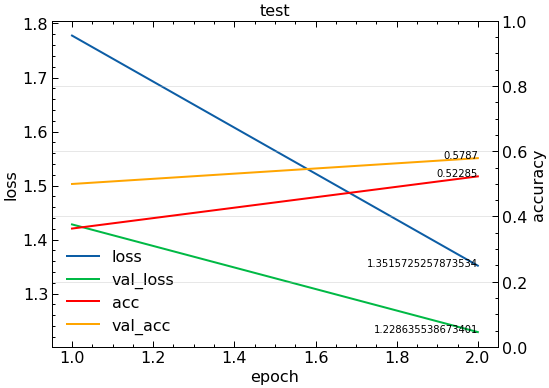

In [9]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [10]:
label = 'NoChanged'
# train
model = network(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=10, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 37s 922us/step - loss: 1.7113 - acc: 0.3865 - val_loss: 1.3971 - val_acc: 0.5034
Epoch 2/10
40000/40000 [==============================] - 37s 919us/step - loss: 1.3196 - acc: 0.5340 - val_loss: 1.1470 - val_acc: 0.6034
Epoch 3/10
40000/40000 [==============================] - 37s 922us/step - loss: 1.1484 - acc: 0.5943 - val_loss: 1.1506 - val_acc: 0.5859
Epoch 4/10
40000/40000 [==============================] - 37s 936us/step - loss: 1.0416 - acc: 0.6319 - val_loss: 0.9985 - val_acc: 0.6526
Epoch 5/10
40000/40000 [==============================] - 37s 929us/step - loss: 0.9611 - acc: 0.6625 - val_loss: 1.0841 - val_acc: 0.6206
Epoch 6/10
40000/40000 [==============================] - 38s 941us/step - loss: 0.8958 - acc: 0.6855 - val_loss: 0.9615 - val_acc: 0.6664
Epoch 7/10
40000/40000 [==============================] - 37s 926us/step - loss: 0.8357 - acc: 0.7096 - val_loss: 0.

Test loss: 0.853176930141449
Test accuracy: 0.7068


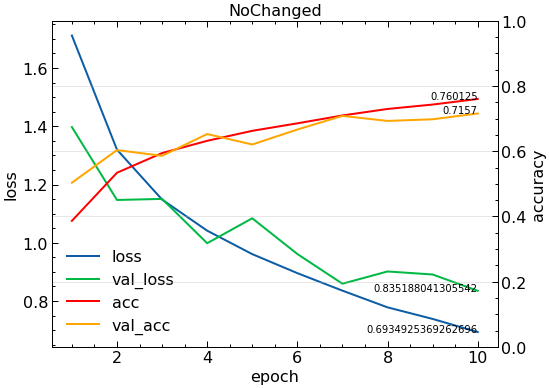

In [11]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [12]:
label = 'Epoch20'
# train
model = network(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 37s 934us/step - loss: 1.7376 - acc: 0.3772 - val_loss: 1.4143 - val_acc: 0.5011
Epoch 2/20
40000/40000 [==============================] - 37s 924us/step - loss: 1.3234 - acc: 0.5324 - val_loss: 1.2877 - val_acc: 0.5378
Epoch 3/20
40000/40000 [==============================] - 37s 925us/step - loss: 1.1477 - acc: 0.5965 - val_loss: 1.0915 - val_acc: 0.6116
Epoch 4/20
40000/40000 [==============================] - 37s 923us/step - loss: 1.0411 - acc: 0.6330 - val_loss: 1.0739 - val_acc: 0.6239
Epoch 5/20
40000/40000 [==============================] - 37s 923us/step - loss: 0.9611 - acc: 0.6650 - val_loss: 1.0923 - val_acc: 0.6168
Epoch 6/20
40000/40000 [==============================] - 37s 927us/step - loss: 0.8919 - acc: 0.6873 - val_loss: 0.9392 - val_acc: 0.6741
Epoch 7/20
40000/40000 [==============================] - 37s 924us/step - loss: 0.8315 - acc: 0.7090 - val_loss: 0.

Test loss: 0.8961698028564453
Test accuracy: 0.714


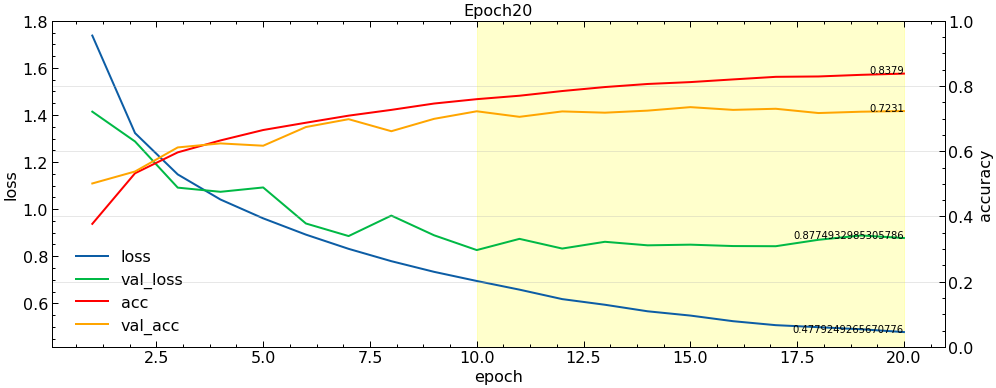

In [13]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [14]:
label = 'Epoch20_Convolution64'
# train
model = network_Conv64(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 86s 2ms/step - loss: 1.7154 - acc: 0.3868 - val_loss: 1.4622 - val_acc: 0.5101
Epoch 2/20
40000/40000 [==============================] - 86s 2ms/step - loss: 1.2770 - acc: 0.5496 - val_loss: 1.1237 - val_acc: 0.6108
Epoch 3/20
40000/40000 [==============================] - 87s 2ms/step - loss: 1.0904 - acc: 0.6176 - val_loss: 1.0165 - val_acc: 0.6465
Epoch 4/20
40000/40000 [==============================] - 86s 2ms/step - loss: 0.9713 - acc: 0.6590 - val_loss: 0.9840 - val_acc: 0.6576
Epoch 5/20
40000/40000 [==============================] - 86s 2ms/step - loss: 0.8853 - acc: 0.6923 - val_loss: 0.9191 - val_acc: 0.6858
Epoch 6/20
40000/40000 [==============================] - 86s 2ms/step - loss: 0.8092 - acc: 0.7218 - val_loss: 0.8679 - val_acc: 0.7075
Epoch 7/20
40000/40000 [==============================] - 86s 2ms/step - loss: 0.7485 - acc: 0.7428 - val_loss: 0.8126 - val_acc

Test loss: 0.9309049360275269
Test accuracy: 0.7248


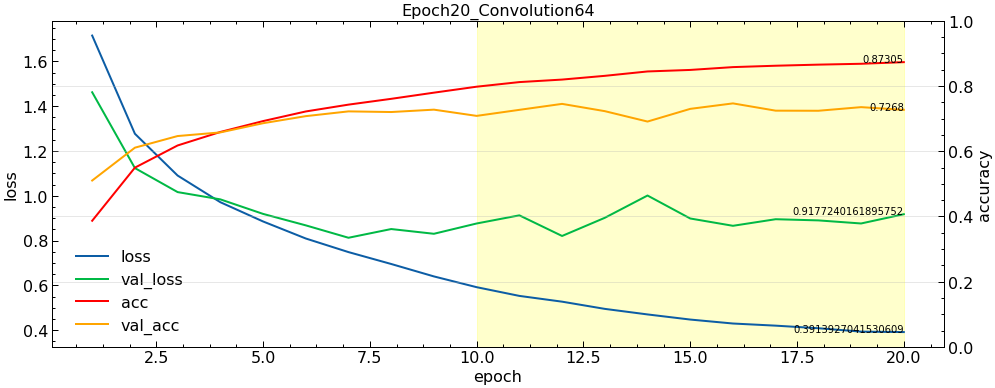

In [15]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [16]:
label = 'Epoch20_AddConv'
# train
model = network_addConv(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.7377 - acc: 0.3703 - val_loss: 1.3277 - val_acc: 0.5236
Epoch 2/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.2607 - acc: 0.5574 - val_loss: 1.0272 - val_acc: 0.6415
Epoch 3/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.0370 - acc: 0.6365 - val_loss: 0.9645 - val_acc: 0.6622
Epoch 4/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.8939 - acc: 0.6869 - val_loss: 0.9166 - val_acc: 0.6778
Epoch 5/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.7875 - acc: 0.7259 - val_loss: 0.9060 - val_acc: 0.6932
Epoch 6/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.7026 - acc: 0.7522 - val_loss: 0.8034 - val_acc: 0.7280
Epoch 7/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.6309 - acc: 0.7824 - val_loss: 0.7494 - val_acc

Test loss: 0.9461483489990234
Test accuracy: 0.7075


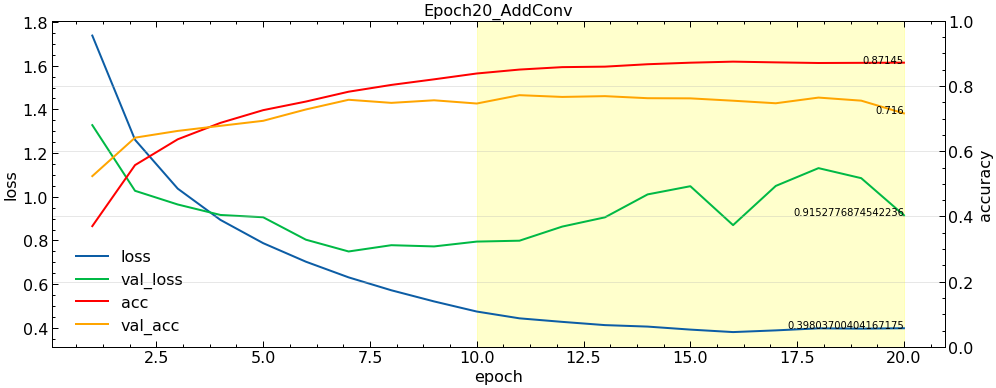

In [17]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [18]:
label = 'Epoch20_Conv64_Nadam'
# train
model = network_Conv64(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 93s 2ms/step - loss: 1.7619 - acc: 0.3696 - val_loss: 1.3084 - val_acc: 0.5486
Epoch 2/20
40000/40000 [==============================] - 93s 2ms/step - loss: 1.2603 - acc: 0.5543 - val_loss: 1.1610 - val_acc: 0.5912
Epoch 3/20
40000/40000 [==============================] - 93s 2ms/step - loss: 1.0642 - acc: 0.6229 - val_loss: 1.0193 - val_acc: 0.6486
Epoch 4/20
40000/40000 [==============================] - 93s 2ms/step - loss: 0.9353 - acc: 0.6700 - val_loss: 0.9169 - val_acc: 0.6785
Epoch 5/20
40000/40000 [==============================] - 93s 2ms/step - loss: 0.8371 - acc: 0.7048 - val_loss: 0.8413 - val_acc: 0.7163
Epoch 6/20
40000/40000 [==============================] - 93s 2ms/step - loss: 0.7494 - acc: 0.7359 - val_loss: 0.8466 - val_acc: 0.7106
Epoch 7/20
40000/40000 [==============================] - 93s 2ms/step - loss: 0.6814 - acc: 0.7584 - val_loss: 0.8204 - val_acc

Test loss: 1.0911146651744843
Test accuracy: 0.7345


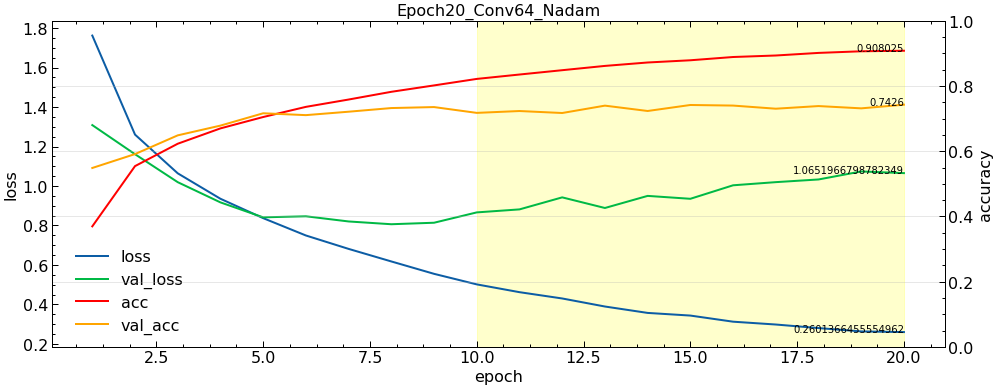

In [19]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [20]:
label = 'Epoch20_addConv_Nadam'
# train
model = network_addConv(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 95s 2ms/step - loss: 1.9061 - acc: 0.3074 - val_loss: 1.4703 - val_acc: 0.4779
Epoch 2/20
40000/40000 [==============================] - 95s 2ms/step - loss: 1.3350 - acc: 0.5187 - val_loss: 1.1016 - val_acc: 0.6090
Epoch 3/20
40000/40000 [==============================] - 95s 2ms/step - loss: 1.0632 - acc: 0.6257 - val_loss: 1.0548 - val_acc: 0.6360
Epoch 4/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.9139 - acc: 0.6785 - val_loss: 0.8832 - val_acc: 0.6906
Epoch 5/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.7961 - acc: 0.7198 - val_loss: 0.8233 - val_acc: 0.7128
Epoch 6/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.7132 - acc: 0.7508 - val_loss: 0.7968 - val_acc: 0.7233
Epoch 7/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.6426 - acc: 0.7738 - val_loss: 0.7746 - val_acc

Test loss: 1.0571751950740815
Test accuracy: 0.7449


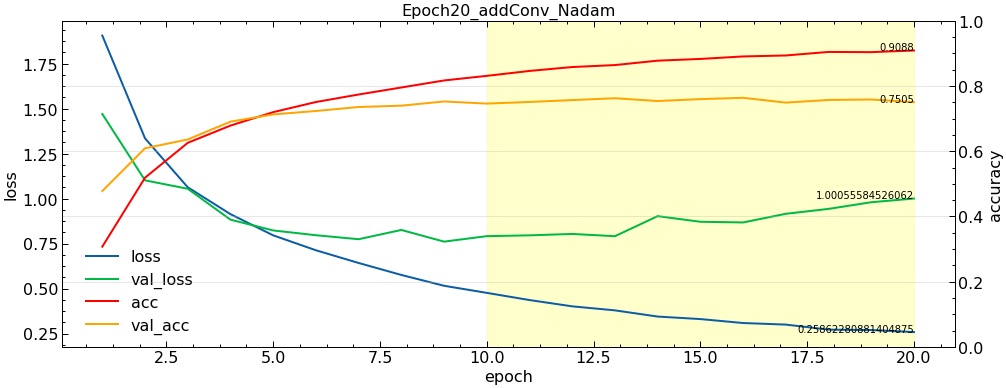

In [21]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [22]:
label = 'Epoch20_addConv_Nadam_BatchNormal'
# train
model = network_addConv_BatchNormal(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 96s 2ms/step - loss: 1.3599 - acc: 0.5164 - val_loss: 2.0987 - val_acc: 0.4093
Epoch 2/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.9626 - acc: 0.6583 - val_loss: 1.2515 - val_acc: 0.5797
Epoch 3/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.8187 - acc: 0.7107 - val_loss: 1.3893 - val_acc: 0.5678
Epoch 4/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.7272 - acc: 0.7427 - val_loss: 0.9789 - val_acc: 0.6855
Epoch 5/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.6534 - acc: 0.7696 - val_loss: 0.8079 - val_acc: 0.7286
Epoch 6/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.5876 - acc: 0.7917 - val_loss: 0.7730 - val_acc: 0.7362
Epoch 7/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.5383 - acc: 0.8104 - val_loss: 0.8961 - val_acc

Test loss: 0.8882834105968476
Test accuracy: 0.7769


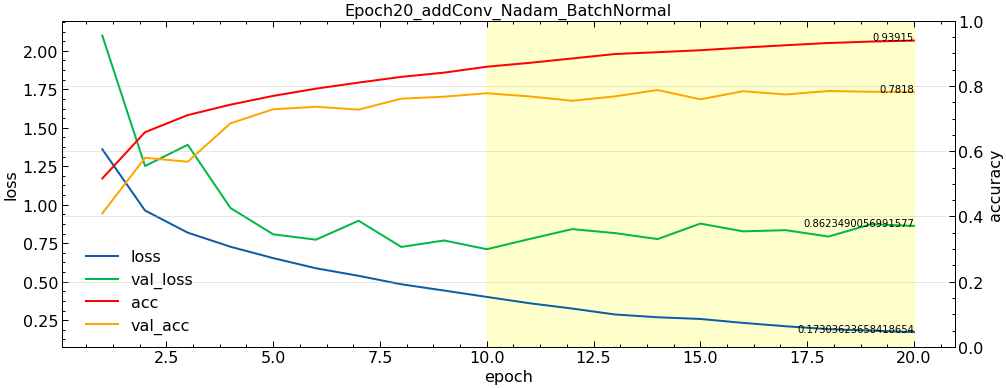

In [23]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [24]:
label = 'Epoch20_addConv_Nadam_DropOut05'
# train
model = network_addConv_Drop05(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 96s 2ms/step - loss: 1.9112 - acc: 0.3053 - val_loss: 1.4658 - val_acc: 0.4795
Epoch 2/20
40000/40000 [==============================] - 96s 2ms/step - loss: 1.3700 - acc: 0.5137 - val_loss: 1.2656 - val_acc: 0.5596
Epoch 3/20
40000/40000 [==============================] - 96s 2ms/step - loss: 1.1136 - acc: 0.6050 - val_loss: 1.1542 - val_acc: 0.5900
Epoch 4/20
40000/40000 [==============================] - 96s 2ms/step - loss: 0.9786 - acc: 0.6555 - val_loss: 0.8886 - val_acc: 0.6870
Epoch 5/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.8778 - acc: 0.6878 - val_loss: 0.8312 - val_acc: 0.7072
Epoch 6/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.8016 - acc: 0.7158 - val_loss: 0.9258 - val_acc: 0.6903
Epoch 7/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.7415 - acc: 0.7389 - val_loss: 0.7781 - val_acc

Test loss: 0.9532124376296998
Test accuracy: 0.7419


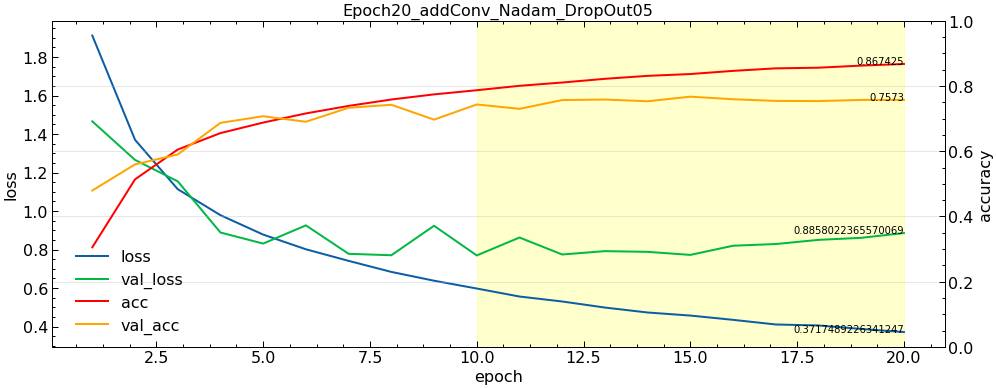

In [25]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [26]:
label = 'Epoch20_addConv_Nadam_addDropOut'
# train
model = network_addConv_addDO(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 97s 2ms/step - loss: 1.8904 - acc: 0.3101 - val_loss: 1.5072 - val_acc: 0.4530
Epoch 2/20
40000/40000 [==============================] - 97s 2ms/step - loss: 1.3587 - acc: 0.5126 - val_loss: 1.1590 - val_acc: 0.5926
Epoch 3/20
40000/40000 [==============================] - 96s 2ms/step - loss: 1.1356 - acc: 0.5996 - val_loss: 0.9675 - val_acc: 0.6597
Epoch 4/20
40000/40000 [==============================] - 96s 2ms/step - loss: 0.9768 - acc: 0.6569 - val_loss: 0.8719 - val_acc: 0.6962
Epoch 5/20
40000/40000 [==============================] - 96s 2ms/step - loss: 0.8760 - acc: 0.6902 - val_loss: 0.8416 - val_acc: 0.7060
Epoch 6/20
40000/40000 [==============================] - 96s 2ms/step - loss: 0.8062 - acc: 0.7158 - val_loss: 0.7560 - val_acc: 0.7363
Epoch 7/20
40000/40000 [==============================] - 96s 2ms/step - loss: 0.7413 - acc: 0.7390 - val_loss: 0.7477 - val_acc

Test loss: 0.76194990234375
Test accuracy: 0.7648


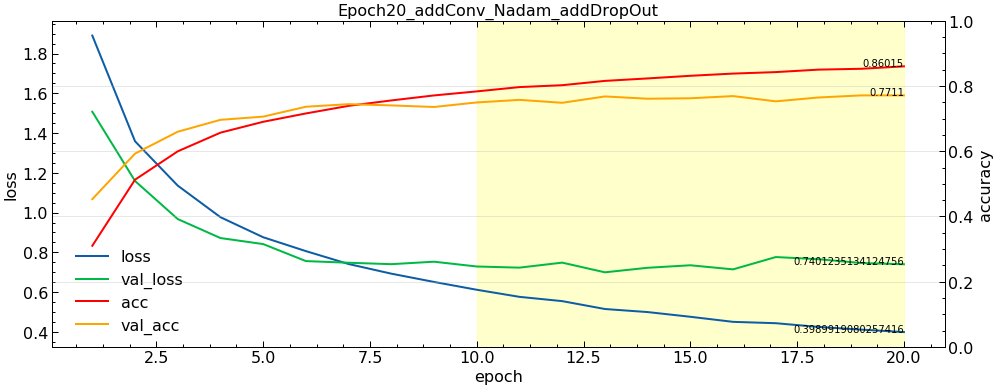

In [27]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [28]:
label = 'Epoch20_addConv_Nadam_BatchNormal_batch256'
# train
model = network_addConv_BatchNormal(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=256, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 95s 2ms/step - loss: 1.4293 - acc: 0.4954 - val_loss: 1.7524 - val_acc: 0.4589
Epoch 2/20
40000/40000 [==============================] - 94s 2ms/step - loss: 0.9990 - acc: 0.6463 - val_loss: 3.0212 - val_acc: 0.3578
Epoch 3/20
40000/40000 [==============================] - 94s 2ms/step - loss: 0.8428 - acc: 0.7012 - val_loss: 1.3524 - val_acc: 0.5707
Epoch 4/20
40000/40000 [==============================] - 93s 2ms/step - loss: 0.7322 - acc: 0.7420 - val_loss: 0.7956 - val_acc: 0.7253
Epoch 5/20
40000/40000 [==============================] - 93s 2ms/step - loss: 0.6492 - acc: 0.7707 - val_loss: 2.1445 - val_acc: 0.5037
Epoch 6/20
40000/40000 [==============================] - 93s 2ms/step - loss: 0.5836 - acc: 0.7933 - val_loss: 0.9104 - val_acc: 0.7172
Epoch 7/20
40000/40000 [==============================] - 93s 2ms/step - loss: 0.5253 - acc: 0.8151 - val_loss: 1.1057 - val_acc

Test loss: 0.9378697190284729
Test accuracy: 0.7756


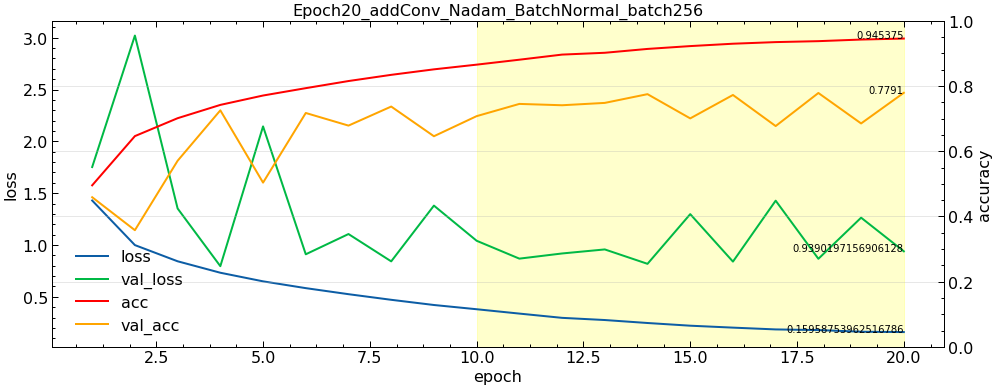

In [29]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [30]:
label = 'Epoch20_addConv_Nadam_addDropOut_batch256'
# train
model = network_addConv_addDO(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=256, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 95s 2ms/step - loss: 2.0178 - acc: 0.2663 - val_loss: 1.6802 - val_acc: 0.3864
Epoch 2/20
40000/40000 [==============================] - 94s 2ms/step - loss: 1.6710 - acc: 0.4032 - val_loss: 1.4071 - val_acc: 0.4871
Epoch 3/20
40000/40000 [==============================] - 94s 2ms/step - loss: 1.3240 - acc: 0.5282 - val_loss: 1.1851 - val_acc: 0.5792
Epoch 4/20
40000/40000 [==============================] - 95s 2ms/step - loss: 1.1303 - acc: 0.5976 - val_loss: 1.2556 - val_acc: 0.5594
Epoch 5/20
40000/40000 [==============================] - 94s 2ms/step - loss: 1.0545 - acc: 0.6267 - val_loss: 0.9085 - val_acc: 0.6822
Epoch 6/20
40000/40000 [==============================] - 93s 2ms/step - loss: 0.9061 - acc: 0.6774 - val_loss: 1.0667 - val_acc: 0.6376
Epoch 7/20
40000/40000 [==============================] - 93s 2ms/step - loss: 0.8392 - acc: 0.7001 - val_loss: 0.8725 - val_acc

Test loss: 0.7811028385162353
Test accuracy: 0.7583


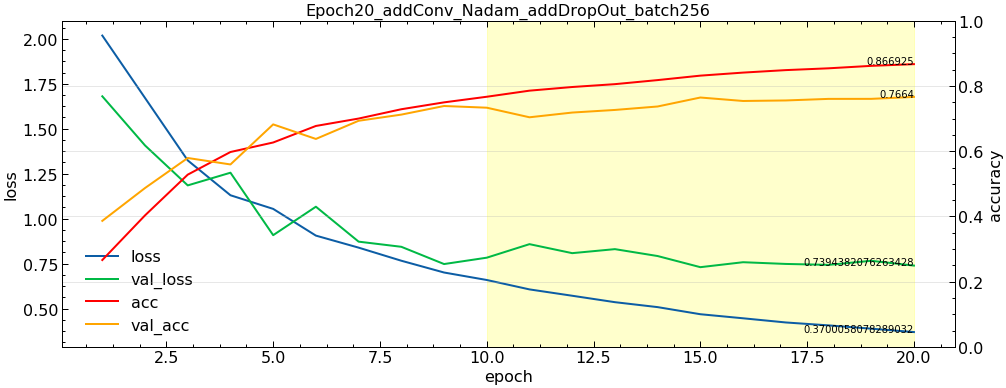

In [ ]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [ ]:
label = 'Epoch20_addConv_Nadam_BatchNormal_batch512'
# train
model = network_addConv_BatchNormal(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=512, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 93s 2ms/step - loss: 1.5119 - acc: 0.4652 - val_loss: 2.7358 - val_acc: 0.3189
Epoch 2/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.0472 - acc: 0.6294 - val_loss: 1.7291 - val_acc: 0.4224
Epoch 3/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.8669 - acc: 0.6946 - val_loss: 2.1471 - val_acc: 0.4176
Epoch 4/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.7578 - acc: 0.7344 - val_loss: 2.0935 - val_acc: 0.4917
Epoch 5/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.6683 - acc: 0.7634 - val_loss: 3.9492 - val_acc: 0.3274
Epoch 6/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.6094 - acc: 0.7856 - val_loss: 1.5321 - val_acc: 0.5776
Epoch 7/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.5332 - acc: 0.8126 - val_loss: 3.8445 - val_acc

In [ ]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))